Bibliotecas

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Regime Tributário

In [32]:
#Tabela Progressiva IRPF > Faixa : Alíquota, Dedução
tabela_progressiva = {2112.01: [0.075, 158.40],
                      2826.66: [0.15, 370.40],
                      3751.06: [0.225, 651.73],
                      4664.68: [0.275, 884.96]}

#Para contribuintes acima de 65 anos > + R$ 1903.98
tabela_progressiva_2 = {faixa + 1903.98: valor for faixa, valor in tabela_progressiva.items()}    

#Tabela Regressiva > Período : Alíquota
tabela_regressiva = {0:[0.35],
                     2:[0.30],
                     4:[0.25],
                     6:[0.20],
                     8:[0.15],
                     10:[0.10]}

#Simulador de regime tributário ideal
def Simulador_Tributário(renda_mensal,prazo_anos):
    
    global aliquota_progressiva
    global tabela_progressiva
    global tabela_progressiva_2
    global valor
    global faixa
    
    aliquota_progressiva = 0 
    if idade >= 65: 

        for faixa, valor in tabela_progressiva_2.items():
            if renda_mensal > faixa:
                aliquota_progressiva = valor[0]
            else:
                aliquota_progressiva = 0
                break
                
    else:
            
        for faixa, valor in tabela_progressiva.items():
            if renda_mensal > faixa:
                aliquota_progressiva = valor[0]
            else:
                aliquota_progressiva = 0
                break
            
    global aliquota_regressiva
    global aliq_regressiva
    
    aliquota_regressiva = 0     
    for prazo_regressiva, aliq_regressiva in tabela_regressiva.items():
        if prazo_anos > prazo_regressiva:
            aliquota_regressiva = aliq_regressiva[0]
        else:
            break
    return

Projeção de Saldo

In [33]:
def Valor_Futuro(renda_mensal,juros_anual,prazo_anos):
    
        #Taxa equivalente mensal
        juros_mensal = (1 + juros_anual/100)**(1/12)-1
        meses = prazo_anos*12

        periodos = np.arange(0, meses+1)

        saldo_final = []
        valor_futuro = 0 

        #Cálculo valor futuro com aportes mensais
        for t in periodos:
            valor_futuro = 0 
            valor_futuro += aplicacao_mensal*((1+juros_mensal)**t - 1)/juros_mensal
            saldo_final.append(valor_futuro)
        
        #Gráfico de Rentabilidade
        plt.rcParams['font.family'] = 'monospace'
        plt.rcParams['font.weight'] = 'normal'
        plt.figure(figsize=(6, 3))
        plt.plot(periodos, saldo_final, label=f'Total Acumulado: R$ {np.max(saldo_final):.2f}.')
        plt.ticklabel_format(style='plain')
        plt.xlabel('Períodos (meses)')
        plt.ylabel('Total Acumulado (R$)')
        plt.title('Evolução do saldo ao longo do tempo', fontsize=10)
        plt.legend()
        plt.grid(True)
        plt.show()
        return plt

Simulador do Usuário


-----------------------Insira as informações abaixo-----------------------

Qual a sua renda mensal tributável? 
Renda: R$ 4000

Quanto está disposto aplicar por mês? 
Renda: R$ 2000

Qual é a sua expectativa de rentabilidade anual? (Formato: 10.50% = 10.50) 
Taxa: 1

Qual é a o seu horizonte de investimentos? 
Anos:1

---------------Vamos escolher a melhor modalidade pra você----------------

Você usa modelo completo ou simplificado na declaração de imposto de renda? 
    
1 - Completo 
2 - Simplificado 
    
Eu uso o modelo (1 ou 2): 1

Você é contribuinte ou beneficiário do INSS? 
    
1 - Sim 
2 - Não
    
Eu uso (1 ou 2): 1

Qual é a sua idade?
    
Idade: 65

--------------------------------Resultado---------------------------------

A renda mensal de R$ 4000.00 é inferior a R$ 4015.99, portanto você é isento de IR e não há deduções a fazer.

------------------------------Alíquota Ideal------------------------------

Aliquota Progressiva 0.00 %.
Aliquota Regressiva 35.00 %.
A ta

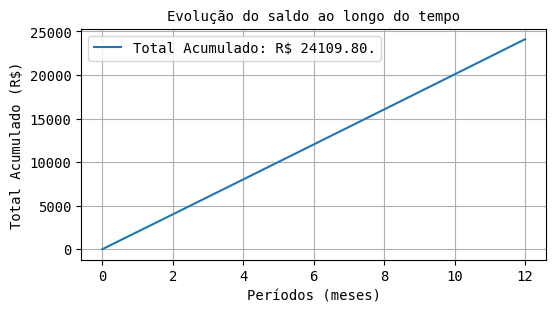

<module 'matplotlib.pyplot' from 'C:\\Users\\emanu\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [34]:
print("\n"+"-"*23+"Insira as informações abaixo"+"-"*23)    

#Informações do Usuário
renda_mensal = float(input("\nQual a sua renda mensal tributável? \nRenda: R$ "))
aplicacao_mensal = float(input("\nQuanto está disposto aplicar por mês? \nRenda: R$ "))
juros_anual = float(input("\nQual é a sua expectativa de rentabilidade anual? (Formato: 10.50% = 10.50) \nTaxa: "))
prazo_anos = float(input("\nQual é a o seu horizonte de investimentos? \nAnos:"))

#Modalidade Ideal > PGBL & VGBL
while True:

    print("\n"+"-"*15+"Vamos escolher a melhor modalidade pra você"+"-"*16)    
    
    #Modelo de Declaração do IRPF
    modelo_declaracao = str(input("""\nVocê usa modelo completo ou simplificado na declaração de imposto de renda? 
    \n1 - Completo \n2 - Simplificado 
    \nEu uso o modelo (1 ou 2): """))
    
    inss = str(input("""\nVocê é contribuinte ou beneficiário do INSS? 
    \n1 - Sim \n2 - Não
    \nEu uso (1 ou 2): """))
    
    idade = float(input("""\nQual é a sua idade?
    \nIdade: """))
                      
    #Modelo Completo de IR
    if modelo_declaracao and inss == "1":
        
        renda_anual = renda_mensal*12
        
        #Dedução máxima PGBL ~ 12%
        deducao_pgbl = renda_anual*0.12
        
        #loop que verifica qual faixa de IR o usuário está sujeito
        Simulador_Tributário(renda_mensal,prazo_anos)
        
        if aliquota_progressiva > 0:

                print("\nO PGBL é a modalidade mais indicada para você!")
                
                print("\n"+"-"*32+"Resultado"+"-"*33)
            
                aliquota_cobrada = valor[0]
                deducao_anual = valor[1]*12
                
                sem_pgbl = renda_anual*aliquota_cobrada-deducao_anual
                com_pgbl = (renda_anual-deducao_pgbl)*aliquota_cobrada-deducao_anual
                
                economia = sem_pgbl - com_pgbl
                
                print(f"\nA sua renda anual tributável é de R$ {renda_anual:.2f}.")
                print(f"Alíquota de IR: {aliquota_cobrada*100:.2f} %.")
                print(f"IR a pagar sem PGBL R$ {sem_pgbl:.2f}.")
                print(f"IR a pagar com PGBL R$ {com_pgbl:.2f}.")
                print(f"O aporte sugerido em PGBL é de R$ {deducao_pgbl:.2f} ao ano ou R$ {(deducao_pgbl/12):.2f} por mês.")
                if renda_mensal*0.12 > aplicacao_mensal:
                    print(f"Você deve aplicar mais R$ {(renda_mensal*0.12-aplicacao_mensal):.2f} para obter todo o benefício fiscal.")
                else:
                    print(f"Você deve aplicar R$ {renda_mensal*0.12} em PGBL e R$ {(aplicacao_mensal-renda_mensal*0.12):.2f} em VGBL.")
                print(f"Sua economia fiscal será de R$ {economia:.2f} ao ano e R$ {economia*prazo_anos:.2f} ao longo do período!")
                break
            
        else:
            
                print("\n"+"-"*32+"Resultado"+"-"*33)
                
                print(f"\nA renda mensal de R$ {renda_mensal:.2f} é inferior a R$ {faixa:.2f}, portanto você é isento de IR e não há deduções a fazer.")
                break
        break
        
    #Modelo Simplificado de IR
    elif modelo_declaracao or inss == "2":
        
        print("\n"+"-"*31+"Modelo Ideal"+"-"*31)
        print("\nO VGBL é a modalidade mais indicado para você!")
        
        break
    
    #Erro
    else:
        print("\nFavor inserir uma opção válida.")

#Regime Tributário        

print("\n"+"-"*30+"Alíquota Ideal"+"-"*30)                

Simulador_Tributário(renda_mensal,prazo_anos)

print(f"\nAliquota Progressiva {aliquota_progressiva*100:.2f} %.")        
print(f"Aliquota Regressiva {aliquota_regressiva*100:.2f} %.")

if aliquota_progressiva < aliquota_regressiva:
    print(f"A tabela mais indicada é a progressiva.")
else:
    print(f"A tabela mais indicada é a regressiva.")

#Saldo Acumulado

print("\n"+"-"*28+"Gráfico de Retorno"+"-"*28)  

Valor_Futuro(renda_mensal,juros_anual,prazo_anos)